# Seattle Library data analysis
# Module 1, assignment 4

In [1]:
import urllib.request
import pandas as pd

## Fragestellung 1: Wieviel Prozent der Ausleihen waren pro Jahr digital/physisch?
## Checkout-Daten über API und in Datei abspeichern


In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$select=checkoutyear,SUM(checkouts)&$group=checkoutyear&$where=usageclass='Digital'"
checkout_file_digi = "checkout_digi.csv"
urllib.request.urlretrieve(url,checkout_file_digi)

url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$select=checkoutyear,SUM(checkouts)&$group=checkoutyear&$where=usageclass='Physical'"
checkout_file_phys = "checkout_phys.csv"
urllib.request.urlretrieve(url,checkout_file_phys)


('checkout_phys.csv', <http.client.HTTPMessage at 0x7f3620fcc2b0>)

## Daten in DataFrame laden und analysieren

In [3]:
checkouts_digi_df = pd.read_csv(checkout_file_digi)
checkouts_digi_df = checkouts_digi_df.rename(columns={'SUM_checkouts':'digi_checkouts'})

checkouts_phys_df = pd.read_csv(checkout_file_phys)
checkouts_phys_df = checkouts_phys_df.rename(columns={'SUM_checkouts':'phys_checkouts'})



In [4]:
checkouts_df = checkouts_digi_df.merge(checkouts_phys_df,on='checkoutyear')

In [5]:
checkouts_df

,checkoutyear,digi_checkouts,phys_checkouts
0,2005,3959,3794726
1,2006,16839,6582479
2,2007,34620,7092007
3,2008,63945,8374541
4,2009,99329,9035838
5,2010,183920,8425046
6,2011,536937,7784795
7,2012,863922,7299124
8,2013,1192836,7864260
9,2014,1719202,7416879


In [6]:
checkouts_df['gesamt_checkouts']=checkouts_df['digi_checkouts']+checkouts_df['phys_checkouts']

In [7]:
checkouts_df['digi_percent']=(checkouts_df['digi_checkouts']/checkouts_df['gesamt_checkouts']*100)

In [8]:
checkouts_df['phys_percent']=(checkouts_df['phys_checkouts']/checkouts_df['gesamt_checkouts']*100)

In [9]:
checkouts_df

,checkoutyear,digi_checkouts,phys_checkouts,gesamt_checkouts,digi_percent,phys_percent
0,2005,3959,3794726,3798685,0.104220,99.895780
1,2006,16839,6582479,6599318,0.255163,99.744837
2,2007,34620,7092007,7126627,0.485784,99.514216
3,2008,63945,8374541,8438486,0.757778,99.242222
4,2009,99329,9035838,9135167,1.087325,98.912675
5,2010,183920,8425046,8608966,2.136377,97.863623
6,2011,536937,7784795,8321732,6.452227,93.547773
7,2012,863922,7299124,8163046,10.583329,89.416671
8,2013,1192836,7864260,9057096,13.170182,86.829818
9,2014,1719202,7416879,9136081,18.817718,81.182282


In [10]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

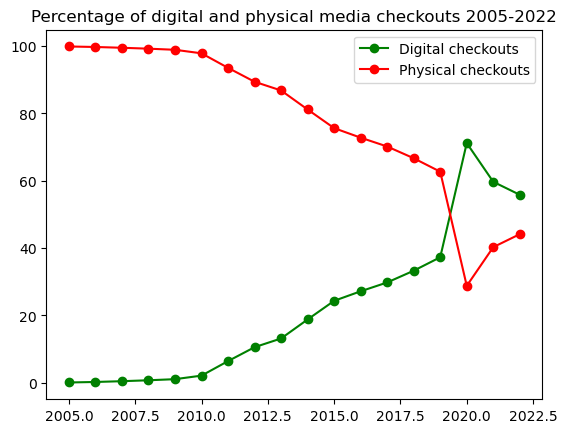

In [11]:
x=list(checkouts_df["checkoutyear"])
y1=list(checkouts_df["digi_percent"])
y2=list(checkouts_df["phys_percent"])
plt.plot(x,y1,color='g',linestyle='solid',marker='o',label='Digital checkouts')
plt.plot(x,y2,color='r',linestyle='solid',marker='o',label='Physical checkouts')
plt.title('Percentage of digital and physical media checkouts 2005-2022')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

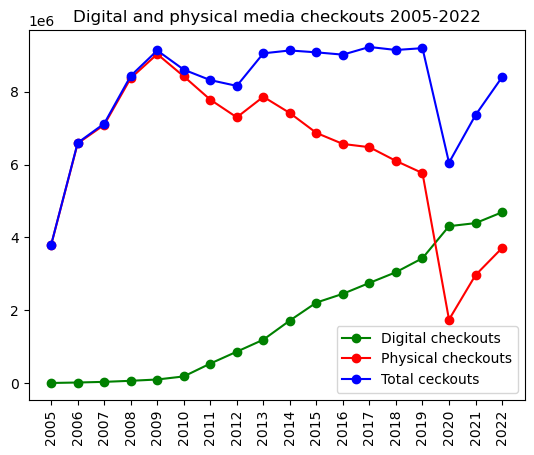

In [12]:
x=list(checkouts_df["checkoutyear"])
y1=list(checkouts_df["digi_checkouts"])
y2=list(checkouts_df["phys_checkouts"])
y3=list(checkouts_df["gesamt_checkouts"])
plt.plot(x,y1,color='g',linestyle='solid',marker='o',label='Digital checkouts')
plt.plot(x,y2,color='r',linestyle='solid',marker='o',label='Physical checkouts')
plt.plot(x,y3,color='b',linestyle='solid',marker='o',label='Total ceckouts')
plt.title('Digital and physical media checkouts 2005-2022')
plt.xticks(x,rotation=90)
plt.legend()
plt.show